In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv("movies.csv")

In [3]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
data.shape

(4803, 24)

In [5]:
columns =  ['genres','keywords','tagline','cast','director']

In [6]:
print(columns)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [7]:
for feature in columns:
    data[feature] = data[feature].fillna('')

In [8]:
feature = data['genres']+' '+ data['keywords']+' '+data['tagline']+' '+data['cast']+' '+data['director']

In [9]:
print(feature)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [10]:
vector = TfidfVectorizer()

In [11]:
vector_feature = vector.fit_transform(feature)

In [12]:
print(vector_feature)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [13]:
scores = cosine_similarity(vector_feature)

In [14]:
print(scores)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [15]:
print(scores.shape)

(4803, 4803)


In [16]:
movie_name = input(' Enter Movie Name : ')

 Enter Movie Name : Mortdecai


In [17]:
titles = data['title'].tolist()

In [18]:
print(titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [19]:
match = difflib.get_close_matches(movie_name, titles)

In [20]:
print(match)

['Mortdecai']


In [21]:
similar_match = match[0]

In [22]:
print(similar_match)

Mortdecai


In [23]:
movie = data[data.title == similar_match]['index'].values[0]

In [24]:
print(movie)

783


In [25]:
similar_movies = list(enumerate(scores[movie]))

In [26]:
print(similar_movies)

[(0, 0.007880239640714732), (1, 0.07053675179355433), (2, 0.051282652648576295), (3, 0.0), (4, 0.04880753634994504), (5, 0.008163311313170817), (6, 0.007976040020555169), (7, 0.053292682914358076), (8, 0.020704851164272516), (9, 0.03220931699001694), (10, 0.008863455416155616), (11, 0.007000389646767341), (12, 0.0744715804718917), (13, 0.06723749161234166), (14, 0.032448683223151156), (15, 0.0670806204749977), (16, 0.03126025305513833), (17, 0.07124071221326767), (18, 0.003991467539917987), (19, 0.006833735648729445), (20, 0.00784753324445682), (21, 0.0066134534017734704), (22, 0.007117140658824199), (23, 0.0068141009436318385), (24, 0.007434250987570437), (25, 0.01085286408764304), (26, 0.008209302095260726), (27, 0.0071785062940977265), (28, 0.007881152777544724), (29, 0.06035287573680504), (30, 0.007942095810922978), (31, 0.10140356357776258), (32, 0.10656151996318612), (33, 0.03276272084554234), (34, 0.0), (35, 0.008297913986335913), (36, 0.007477082690267965), (37, 0.0082857648550

In [27]:
sorted_similar_movies = sorted(similar_movies, key = lambda x:x[1], reverse = True) 

In [28]:
print(sorted_similar_movies)

[(783, 1.0), (2942, 0.22512114865575325), (1882, 0.1557217284235813), (664, 0.15151823392681002), (2487, 0.14673056643394564), (1203, 0.13901793540123852), (2035, 0.13260951474676425), (3887, 0.13184274418213787), (128, 0.12681035287781886), (1553, 0.12263071321465949), (68, 0.12162995562040377), (3393, 0.12127427374843985), (117, 0.12019805423213131), (2651, 0.11966014674274406), (233, 0.11925942591644119), (295, 0.11907669717629352), (1999, 0.11658140644781219), (1945, 0.11542075961395411), (48, 0.11249943200484375), (1885, 0.11146666097795097), (201, 0.11073622446156416), (1701, 0.10929740714307024), (333, 0.10904388462579948), (105, 0.10835793409018539), (3474, 0.10732524172988203), (4615, 0.10668436227958722), (32, 0.10656151996318612), (79, 0.10588103342411903), (3793, 0.10558853865379511), (1025, 0.10510638772456447), (1962, 0.1038546642801123), (3267, 0.10337611112562253), (2859, 0.10314987906720637), (2683, 0.10211188253891079), (31, 0.10140356357776258), (1394, 0.099759521971

In [29]:
print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title = data[data.index==index]['title'].values[0]
    if (i<30):
        print(i, '.',title)
        i+=1

Movies suggested for you : 

1 . Mortdecai
2 . Woman in Gold
3 . Crocodile Dundee in Los Angeles
4 . Hudson Hawk
5 . Duets
6 . Secret Window
7 . Our Kind of Traitor
8 . Trainspotting
9 . Angels & Demons
10 . Se7en
11 . Iron Man
12 . The Heart of Me
13 . Charlie and the Chocolate Factory
14 . The Good Night
15 . Star Wars: Episode I - The Phantom Menace
16 . The Tourist
17 . The Adventurer: The Curse of the Midas Box
18 . The Best Offer
19 . Jack the Giant Slayer
20 . August: Osage County
21 . The Da Vinci Code
22 . Once Upon a Time in Mexico
23 . Transcendence
24 . Alice Through the Looking Glass
25 . The Words
26 . Pierrot le Fou
27 . Alice in Wonderland
28 . Iron Man 2
29 . The Velocity of Gary


Text(0.5, 1.0, 'Popular Movies')

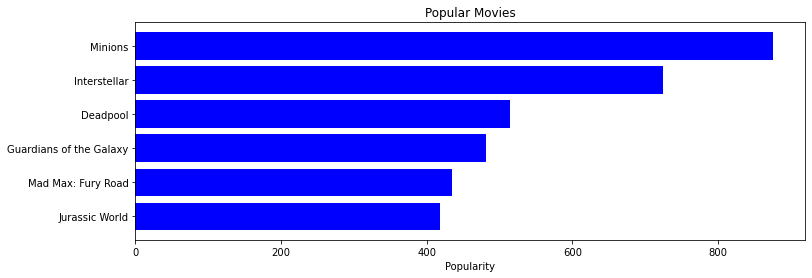

In [31]:
pop= data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies" )